# Припрема и дескриптивна анализа нумеричких података

Пајтон, у својим библиотекама, има мноштво функција за обраду и експлоративну анализу нумеричких података. Уколико је колона у табели чиста и не садржи ништа сем бројева, највећи део уводних анализа можемо да урадимо са врло мало труда.

Да бисмо на располагању имали потребне функције, учитаћемо на почетку три библиотека: __pandas__ (за рад са табелама), __numpy__ (за рад са нумеричким подацима) и __matplotlib.pyplot__ и __seaborn__ (за цртање графикона).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Уколико нису све библиотеке инсталиране, потребно је да их инсталирате, нпр. као `pip install seaborn`.

За потребе вежбања, учитаћемо једну табелу са националног портала отворених података (Општински показатељи последње стање) која садржи и текстуалне и бројчане податке. За случај да учитавање преко интернета не ради, учитаћемо је из директоријума __.\data__.

In [2]:
#df=pd.read_csv("https://data.gov.rs/sr/datasets/r/b1f1f94a-fe21-3a2a-b801-6f0f05b24257",sep=";")
opps=pd.read_csv("data/03IND01.csv",sep=";")

In [3]:
opps

,IDIndikator,Indikator,mes,god,idter,nter,vrednost,CreateDate,LastUpdate,IDLegenda,nIzvorI
0,IND00M01,Градоначелник/председник општине,1,2021,70017,Александровац,МИРКО МИХАЈЛОВИЋ,1/4/2021 7:39:27 AM,1/4/2021 7:39:27 AM,A,Републички завод за статистику (РЗС)
1,IND01G01,Површина (у км²),0,2020,70017,Александровац,387,1/27/2021 10:15:39 AM,1/27/2021 10:22:18 AM,A,Републички геодетски завод (РГЗ)
2,IND01G02,Број становника - процена (последњи расположив...,0,2019,70017,Александровац,23898,7/1/2020 1:01:17 PM,7/1/2020 1:01:17 PM,A,Републички завод за статистику (РЗС)
3,IND01G03,Густина насељености (број становника / км2),0,2019,70017,Александровац,62,7/1/2020 1:01:17 PM,7/1/2020 1:01:17 PM,A,Републички завод за статистику (РЗС)
4,IND01G04,Број насеља,0,2020,70017,Александровац,55,1/27/2021 10:15:39 AM,1/27/2021 10:22:18 AM,A,Републички завод за статистику (РЗС)
...,...,...,...,...,...,...,...,...,...,...,...
13241,IND02M55,Вредност извоза у УСД,11,2020,89010,Град Нови Сад,163079592.279077,12/30/2020 1:45:56 PM,12/30/2020 1:45:56 PM,P,Управа царине и Електро мрежа Србије (УЦ и ЕМС)
13242,IND02M56,Вредност извоза у ЕУР,11,2020,89010,Град Нови Сад,192545516.285837,12/30/2020 1:45:56 PM,12/30/2020 1:45:56 PM,P,Управа царине и Електро мрежа Србије (УЦ и ЕМС)
13243,IND03M03,Број регистрованих незапослених,12,2020,89010,Град Нови Сад,13015,1/14/2021 3:42:52 PM,1/14/2021 3:42:52 PM,A,Национална служба за запошљавање (НСЗ)
13244,IND03M08,"Просечна нето зарада за месец, према општини п...",11,2020,89010,Град Нови Сад,69238,1/19/2021 12:27:15 PM,1/25/2021 12:00:17 PM,A,Републички завод за статистику (РЗС)


Евидентно, у табели имамо различите индикаторе (показатеље) по општинама и годинама који су распоређени на начин који није најзгоднији. Ова огромна табела (има 13246 редова) изгледа као колекција истих табела за појединачне индикаторе. Видимо да ту, на пример, постоји индикатор Површина (у км²), али тај податак не може лако да се обради јер су вредности тог индикатора стављене у колону __vrednost__ са мноштвом других података различитог типа. Када бисмо хтели да нађемо укупну површину свих општина, то не може без додатне обраде података.

Да погледамо за почетак, које типове података овде имамо. 

In [4]:
opps.dtypes

IDIndikator    object
Indikator      object
mes             int64
god             int64
idter           int64
nter           object
vrednost       object
CreateDate     object
LastUpdate     object
IDLegenda      object
nIzvorI        object
dtype: object

Месец, година и матични број оптине су типе _integer_, док су сви остали сложени. Да бисмо ишта могли да анализирамо, мораћемо да издвојимо под-табеле за конкретне показатеље. Које показатеље овде уопште имамо видећемо коришћењем функције `unique()` за податке у колони __Indikator__.

In [5]:
opps['Indikator'].unique()

array(['Градоначелник/председник општине', 'Површина (у км²)',
       'Број становника - процена (последњи расположив податак за годину)',
       'Густина насељености (број становника / км2)', 'Број насеља',
       'Број живорођених',
       'Степен развијености ЈЛС према Закону о регионалном развоју',
       'Степен развијености е-управе', 'Укупна дужина водоводне мреже',
       'Број становника према Попису 2011',
       'Број домаћинстава према Попису 2011',
       'Укупна дужина канализационе мреже', 'Број великих предузећа ',
       'Број средњих предузећа ', 'Број малих предузећа ',
       'Број микро предузећа', 'Број без ознаке за величину',
       'Број активних привредних друштава',
       'Број активних привредних друштава по NACE Rev.2  (сектор A)',
       'Број активних привредних друштава по NACE Rev.2  (сектор B)',
       'Број активних привредних друштава по NACE Rev.2  (сектор C)',
       'Број активних привредних друштава по NACE Rev.2  (сектор D)',
       'Број актив

## Једнодимензионални скупови података

За једноставне анализе је довољно да извучемо само један индикатор који нас интересује. Примера ради, сада ћемо извући само индикатор везан за површину општине.

In [6]:
povrsina=opps[opps['Indikator']=='Површина (у км²)']

In [7]:
povrsina.head()

,IDIndikator,Indikator,mes,god,idter,nter,vrednost,CreateDate,LastUpdate,IDLegenda,nIzvorI
1,IND01G01,Површина (у км²),0,2020,70017,Александровац,387,1/27/2021 10:15:39 AM,1/27/2021 10:22:18 AM,A,Републички геодетски завод (РГЗ)
77,IND01G01,Површина (у км²),0,2020,70025,Алексинац,707,1/27/2021 10:15:40 AM,1/27/2021 10:22:18 AM,A,Републички геодетски завод (РГЗ)
153,IND01G01,Површина (у км²),0,2020,70033,Аранђеловац,376,1/27/2021 10:15:40 AM,1/27/2021 10:22:18 AM,A,Републички геодетски завод (РГЗ)
229,IND01G01,Површина (у км²),0,2020,70041,Ариље,349,1/27/2021 10:15:39 AM,1/27/2021 10:22:18 AM,A,Републички геодетски завод (РГЗ)
305,IND01G01,Површина (у км²),0,2020,70050,Бабушница,529,1/27/2021 10:15:40 AM,1/27/2021 10:22:18 AM,A,Републички геодетски завод (РГЗ)


Изгледа да су сада у колони __vrednost__ само бројеви. Можемо онда а их саберемо и видимо колика је површина свих општина у Србији заједно.

In [8]:
povrsina['vrednost'].sum()

'38770737634952967313651721314833003115038333941410451301427151573063842648288565716064619052493453443383663086022393253678366234831212647602141069109062941312023582578351530342854952721186337102561245427935693218426952419332910905817423195426551232374426264553827759289216670366470326497105948442152562864735737044874212428745631264763679755146288141182117101032582032345964778606672276023803675905961583531844868004005251327385230399782419730481181273609305610203411756489383582294523121628476251350100717026137632168789699'

Упс! Ово нисмо очекивали. Уместо суме бројева, добили смо суму стрингова, тј. спојене вредности свих стрингова у колони  __vrednost__ од '387', '707' па редом. Изгледа да Пајтон и даље не зна да су у колони __vrednost__ бројеви.

In [9]:
povrsina.dtypes

IDIndikator    object
Indikator      object
mes             int64
god             int64
idter           int64
nter           object
vrednost       object
CreateDate     object
LastUpdate     object
IDLegenda      object
nIzvorI        object
dtype: object

Да, Пајтон је задржао тип променљиве који смо имали у оригиналној табели. То треба да променимо помоћу функције `astype()`.

In [10]:
povrsina['vrednost']=povrsina['vrednost'].astype(float)

<ipython-input-10-a9d2a7f56e89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  povrsina['vrednost']=povrsina['vrednost'].astype(float)


In [11]:
povrsina.dtypes

IDIndikator     object
Indikator       object
mes              int64
god              int64
idter            int64
nter            object
vrednost       float64
CreateDate      object
LastUpdate      object
IDLegenda       object
nIzvorI         object
dtype: object

In [12]:
povrsina['vrednost'].sum()

84122.0

Ово делује у реду. Толика је површина Србије.

Сада ћемо обрадити један други нумерички индикатор, просечну нето зараду. Тај индикатор се зове тачно __Просечна нето зарада за месец, према општини пребивалишта запослених__.

In [13]:
neto_zarada=opps[opps['Indikator']=='Просечна нето зарада за месец, према општини пребивалишта запослених']

С обзиром да нам за нумеричку анализу табеле __neto_zarada__ нису потребне све колоне, задржаћемо само три. Матични број задржавамо само због контроле.

In [14]:
neto_zarada=neto_zarada[['idter','nter','vrednost']]

In [15]:
neto_zarada['vrednost']=neto_zarada['vrednost'].astype(float)

Ако желимо да видимо где су у Србији просечне зараде највеће, потребно је да сортирамо табелу према вредности. Сортирање не мења вредности у табели већ нам приказује податке на начин који нама одговара.

In [16]:
neto_zarada.sort_values('vrednost',ascending=False).head(10)

,idter,nter,vrednost
832,70114,Врачар,99052.0
1282,70181,Нови Београд,96326.0
1730,70246,Стари град,96010.0
1580,70220,Савски венац,88020.0
756,70106,Вождовац,79008.0
982,70149,Звездара,78229.0
9384,79014,Град Београд,75649.0
1132,70165,Лазаревац,72684.0
1804,70254,Чукарица,72669.0
9161,71340,Костолац,70934.0


Највеће зараде су, очигледно, у Београду. Прва општина на овој листи која није београска је Костолац.

Када бисмо помоћу функције `max()` тражили општину са највећим зарадама, то би изгледало овако:

In [17]:
neto_zarada[neto_zarada.vrednost==neto_zarada.vrednost.max()]

,idter,nter,vrednost
832,70114,Врачар,99052.0


Функцију __max__ можемо да применимо и на целу табелу, али ће нам тад излаз бити низ максималних вредности по колонама. То нам сад није посебно корисно. Приметите да максимум за нумеричке и текстуалне вредности ради другачије. У првом случају тражи навећу вредност, а у другом податке поређа лексикографски па прикаже последњи у низу.

In [18]:
neto_zarada.max()

idter         89010
nter            Шид
vrednost    99052.0
dtype: object

Ако цео низ бројева због скраћеног приказа или комуникације морамо да сведемо на један број, онда је најбоље узети једну од мера просека: средњу вредност или медијану. Максимална или минимална вредност зарада су куриозитети и не говоре нам много о целом скупу. Средња вредност нам више говори о томе колике су зараде у Србији дајући нам аритметичку средину. Медијана нам даје просек на мало другачији податак, она нам даје типичну вредност зараде, односно колику зараду имају они који су на средини листе о висини зараде. Код симетричних расподела података, средња вредност и медијана се поклапају, али расподела зарада није таква. Увек има више оних са малим зарадама и неколико оних са веома великим. То се врло често злоупотребљава. Већина људи има мање зараде од средње вредности. Кад год је новац у питању, средња вредност буде већа од медијане. 

Пајтон нема функцију за средњу вредност у основном окружењу па је потребно учитати библиотеку __statistics__ да бисмо имали функцију __mean__. Срећом, средња вредност се лако рачуна -- само треба поделити збир свих елемената са њиховим бројем. (Ако вам је лакше учитајте библиотеку па користите __mean__.)

In [19]:
neto_zarada['vrednost'].sum()/neto_zarada['vrednost'].size

52942.137142857144

In [20]:
neto_zarada.vrednost.median()

50655.0

Видимо да средња вредност просечне нето зараде по општинама за више од две хиљаде динара већа него медијана.

### Дескриптивна анализа

Рекли смо раније да се у овом курсу нећемо бавити анализом података јер она подразумева стручно, доменско знање. Ипак, једноставна анализа која не зависи од тог знања увек може да се уради. Дескриптивна анализа даје главне мере једно скупа бројчаних података као што су број елемената (__count__), средња вредност (__mean__), стандардна девијација (__std__), минимум (__min__) итд. Иако све ове мере можемо да добијемо и директно, згодно је да их једном функцијом добијемо све. Функција `describe()` то омогућава.

Приметите само да су нам вредности у колони __vrednost__ и даље типа _object_ због чега не раде све функције. Зато је боље да Пајтону помоћу функције `astype()` објаснимо да је садржај те колоне типа _float_.

In [21]:
neto_zarada.vrednost.describe()

count      175.000000
mean     52942.137143
std       9576.694515
min      41851.000000
25%      47292.000000
50%      50655.000000
75%      54687.000000
max      99052.000000
Name: vrednost, dtype: float64

По свему судећи, расподела вредности из ове колоне није баш симетрична па би било добро да је визуелизујемо, тј. да прикажемо графички. Због тога смо на почетку учитавали библиотеку за цртање. Анализу података је, по правилу, лакше урадити ако "видимо" податке. Зато се нумеричка анализа и визелизација података обично раде истовремено.

За визуелизацију једнодимензионалног скупа података (низа, листе или колоне у табели) најчешће се користи хистограм који нам приказује број елемената у одређеним интервалима, односно расподелу података. Хистограме цртамо помоћу функције `hist()`. Аргумент ове функције, сем низа чије бројеве хоћемо на прикажемо, јесте и опсег бројева у ком  посматрамо хистограм са кораком (величином интрвала). Помоћу функције `axvline` из библиотеке __matplotlib.pyplot__ цртамо вертикалне линије одређене боје, дебљине и стила. Овде ћемо нацртати две вертикалне линије: наранџасту за медијану низа и црвену за средњу вредност.

Приметите да смо функције `median()` и `mean()` преузели из __numpy__ библиотеке.

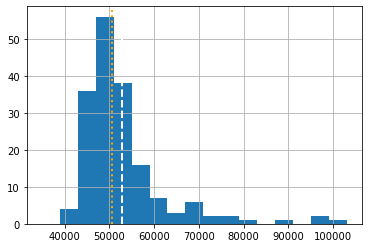

In [22]:
y=neto_zarada.vrednost
y.hist(bins=range(35000,105000,4000))
plt.axvline(x=np.median(y), color='orange', linewidth=2, linestyle=":")
plt.axvline(x=np.mean(y), color='white', linewidth=2, linestyle="--")

Слично, можемо да користимо функцију __hist__ и из библиотеке за цртање. Разлике у начину приказивања нису велике.

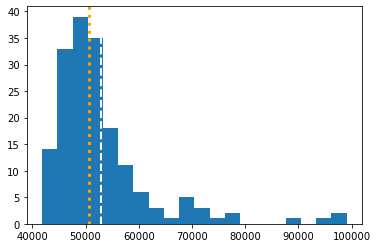

In [23]:
plt.hist(y,bins=20)
plt.axvline(x=np.median(y), color='orange', linewidth=3, linestyle=":")
plt.axvline(x=np.mean(y), color='white', linewidth=2, linestyle="--")

Графичко приказивање расподеле података је, вероватно, најбољи начин да разумемо шта се у том скупу налази, да ли је расподела униформна или има "репове", где су тачке нагомилавања, да ли има "немогућих вредности" итд. Врло често је визуелизација податка део процеса чишћења података. Много је лакше уочити нелогичности у великом скупу података ако успемо да га добро прикажемо графички.

## Пивотирање табеле

Табела коју смо на почетку учитали има 175 редова који се односе на било који индикатор. Ако исецамо само оне редове које нас у том тренутку интересују, изгубићемо све остале. Можда би било боље да трансформишемо табелу __opps__ тако да по редовима буду општине, а по колонама индикатори. То се зове пивотирање табеле.

Заправо, узећемо и матични број и назив општине по редовима због контроле. Никад не знате да ли ће се у листи појавити две општине са истим именом, нпр. Палилула. Зато је добро да увек имамо и јединствени матични број. Та два назива колона ћемо ставити у листу и придружити аргументу __index__. Аргументу __columns__ ћемо придружити све различите вредности које постоје у колони __vrednost__, а аргументу __values__ ћемо придружити вредности из колоне која се баш тако зове, __vrednost__. Пивотирање табеле сада радимо помоћу функције `pivot()`.

In [24]:
pivopps=opps.pivot(index=['idter','nter'], columns='Indikator', values='vrednost')

In [25]:
pivopps

,Indikator,Број активних предузетника,Број активних предузетника по NACE Rev.2 (сектор A),Број активних предузетника по NACE Rev.2 (сектор B),Број активних предузетника по NACE Rev.2 (сектор C),Број активних предузетника по NACE Rev.2 (сектор D),Број активних предузетника по NACE Rev.2 (сектор E),Број активних предузетника по NACE Rev.2 (сектор F),Број активних предузетника по NACE Rev.2 (сектор G),Број активних предузетника по NACE Rev.2 (сектор H),Број активних предузетника по NACE Rev.2 (сектор I),...,Вредност извоза у УСД,Градоначелник/председник општине,Густина насељености (број становника / км2),Површина (у км²),"Просечна нето зарада за месец, према општини пребивалишта запослених","Просечна нето зарада за период јануар-текући месец, према општини пребивалишта запослених",Степен развијености ЈЛС према Закону о регионалном развоју,Степен развијености е-управе,Укупна дужина водоводне мреже,Укупна дужина канализационе мреже
idter,nter,,,,,,,,,,,,,,,,,,,,,
70017,Александровац,1021,22,1,325,0,0,118,225,45,79,...,1893655.65059975,МИРКО МИХАЈЛОВИЋ,62,387,44615,45383,II група,0.309491409041355,199,51
70025,Алексинац,1320,22,4,232,1,8,126,354,156,102,...,9850106.09590895,ДАЛИБОР РАДИЧЕВИЋ,67,707,49394,47896,IV група,0.313142788382875,205,43
70033,Аранђеловац,1828,12,1,336,1,4,240,361,165,181,...,9682257.53441178,БОЈАН РАДОВИЋ,115,376,53319,52354,II група,0.424362734010375,464,182
70041,Ариље,898,7,0,315,0,3,71,150,79,85,...,6754621.8552789,ПРЕДРАГ МАСЛАР,51,349,44510,43791,II група,0.355725723285914,459,68
70050,Бабушница,287,5,0,46,0,0,50,78,25,24,...,915210.700355534,ИВАНА СТОЈИЧИЋ,19,529,47249,46951,IV група - девастирано подручје,0.24716560533865,112,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80462,Врбас,1206,12,0,185,0,5,138,221,188,131,...,4534537.72750178,ПРЕДРАГ РОЈЕВИЋ,104,376,52544,50305,I група,0.462009050383169,232,84
80489,Чока,167,0,0,28,0,0,16,45,12,16,...,629137.305081099,СТАНА ЂЕМБЕР,32,321,49356,48447,III група,0.380526017239722,186,29
80497,Шид,795,18,0,117,0,3,55,199,92,87,...,5150027.81529499,ЗОРАН СЕМЕНОВИЋ,45,687,49784,48868,III група,0.451184243662082,209,67


Приметите како у табели нема оних колона __IDIndikator__, __mes__, __god___ итд. Када смо "разапињали" пивот-табелу рекли смо шта хоћемо по редовима, а шта по колонама. Те заборављене колоне нисмо помињали. Нису нам сад ни потребне.

In [26]:
pivopps.columns

Index(['Број активних предузетника',
       'Број активних предузетника по NACE Rev.2  (сектор A)',
       'Број активних предузетника по NACE Rev.2  (сектор B)',
       'Број активних предузетника по NACE Rev.2  (сектор C)',
       'Број активних предузетника по NACE Rev.2  (сектор D)',
       'Број активних предузетника по NACE Rev.2  (сектор E)',
       'Број активних предузетника по NACE Rev.2  (сектор F)',
       'Број активних предузетника по NACE Rev.2  (сектор G)',
       'Број активних предузетника по NACE Rev.2  (сектор H)',
       'Број активних предузетника по NACE Rev.2  (сектор I)',
       'Број активних предузетника по NACE Rev.2  (сектор J)',
       'Број активних предузетника по NACE Rev.2  (сектор K)',
       'Број активних предузетника по NACE Rev.2  (сектор L)',
       'Број активних предузетника по NACE Rev.2  (сектор M)',
       'Број активних предузетника по NACE Rev.2  (сектор N)',
       'Број активних предузетника по NACE Rev.2  (сектор O)',
       'Број актив

Сада можемо да променимо тип променљивих у табели. Један од начина да то урадимо је да наведемо тачно којим колонама хоћемо да променимо тип података и да наведемо који то тип треба да буде. Овде ћемо изабрати три колоне које ћемо убудуће третирати као нумеричке.

In [27]:
pivopps=pivopps.astype({'Број регистрованих незапослених ': 'float',
                        'Број становника - процена (последњи расположив податак за годину)': 'float',
                        'Просечна нето зарада за месец, према општини пребивалишта запослених': 'float'})

Пивот-табела нам даје вишедемензионални скуп података где анализа може да буде порозвољно сложена. Ми се нећемо у упуштати у анализу већ ћемо само дати примере два типа графичког приказа ових података. У једном примеру ћемо видети како изгледа зависност нумеричке вредности од категоријалне, а у другом нумеричке од нумеричке.

In [28]:
df=pivopps[['Степен развијености ЈЛС према Закону о регионалном развоју',
         'Просечна нето зарада за месец, према општини пребивалишта запослених']]

Користећи библиотеку __seaborn__ и функцију `displot()` пробаћемо да прикажемо мало сложенији, семитранспарентни хистограм где свака боја означава један од пет степени развијености јединице локалне самоуправе. Овде нећемо улазити у детаље функције и њене аргументе.

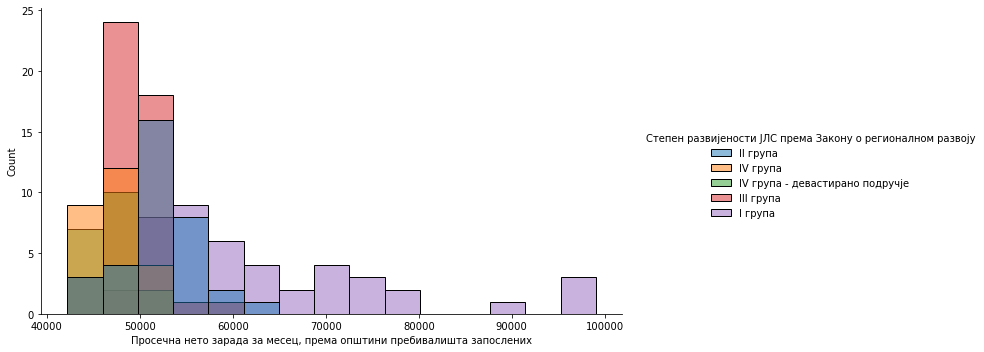

In [29]:
sns.displot(
  data=df,
  x="Просечна нето зарада за месец, према општини пребивалишта запослених",
  hue="Степен развијености ЈЛС према Закону о регионалном развоју",
  kind="hist",
  aspect=1.8,
  bins=15
)

Оно што видимо са хистограма је да су општине са највећим приходом управо оне најравијеније, а да у доњем делу ран-листе има највише општина из треће групе. Такође, видимо и да редослед група у легенди није баш смислен. Пробајте то да средите самостално.

Користећи исту функцију, уместо пет хистограма који се преклапају можемо да нацртамо пет хистограма један поред другог. То ће можда бити прегледније.

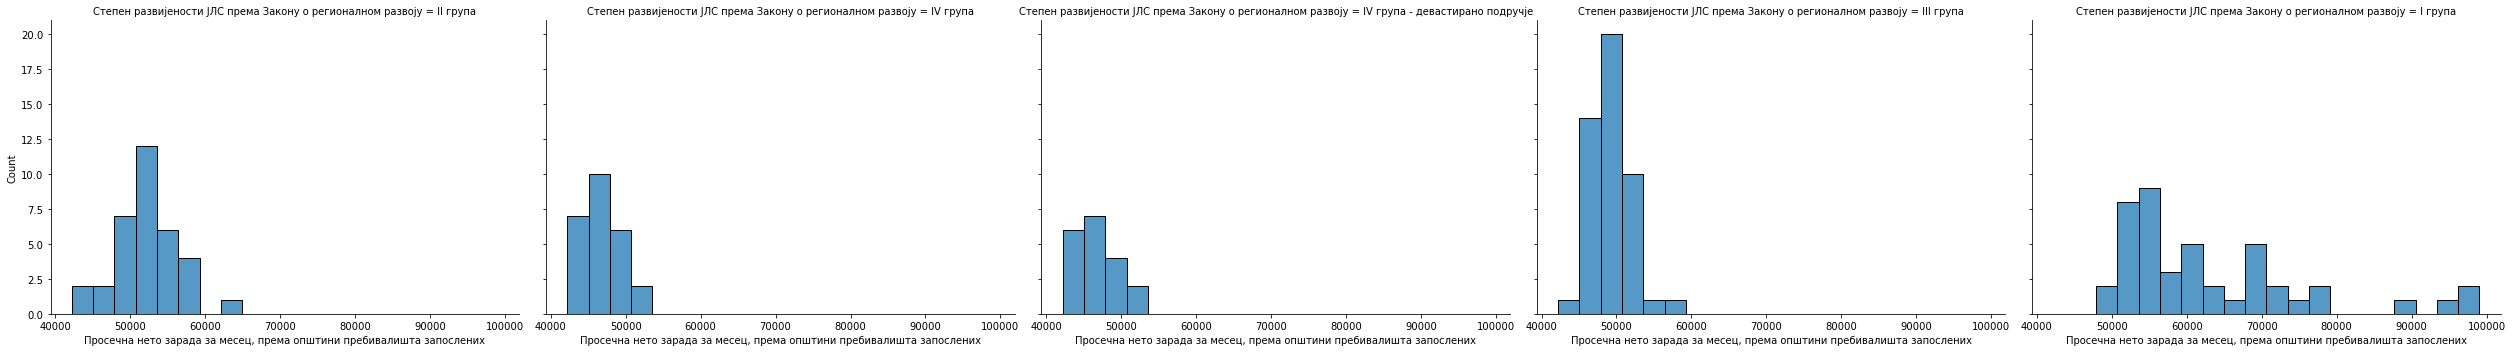

In [30]:
sns.displot(
  data=df,
  x="Просечна нето зарада за месец, према општини пребивалишта запослених",
  col="Степен развијености ЈЛС према Закону о регионалном развоју",
  kind="hist",
  aspect=1.4,
  bins=20
)

Нема сумње да су слова на овом графикону превише мала, али то није нарочит проблем. Ови графикони су слика на html страни. Можемо ту слику да отворимо у новом табу браузера (десни клик на слику па _Open Image in New Tab_) да бисмо је после увећали и пажљиво проучили. Даље сређивање и анализу ових слика препуштамо вама. 

Други начин приказа који смо овде хтели да демонстрирамо је обичан _scatter plot_. Примера ради, приказаћемо омоћу функције `replot()` у каквој су вези просечна зарада и проценат незапослених у општини. Податак о проценту незапослених немамо. Мораћемо прво да га израчунамо.

In [31]:
pivopps['Проценат незапослених']=pivopps['Број регистрованих незапослених ']/pivopps['Број становника - процена (последњи расположив податак за годину)']

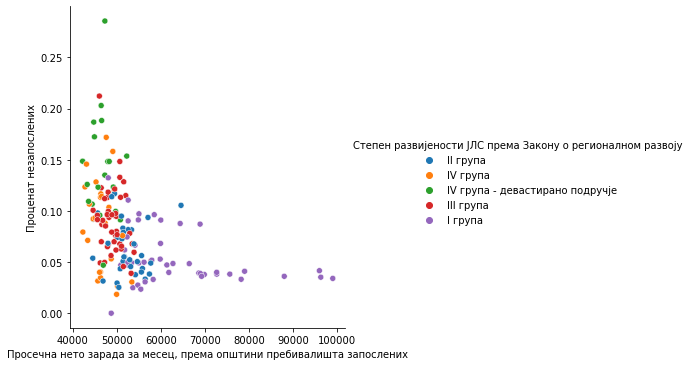

In [32]:
sns.relplot(x="Просечна нето зарада за месец, према општини пребивалишта запослених", 
            y="Проценат незапослених", 
            hue="Степен развијености ЈЛС према Закону о регионалном развоју",
            data=pivopps);

Овај графикон изгледа прилично убедљиво. Јасно видимо каква је веза између зарада и броја незапослених и како она изгледа по степену развијености општина. Даљу анализу препуштамо вама.

## Приказ података на мапи

Многи подаци које имамо у табелама представљају гео-податке, односно податке у вези са разним топонимима, нпр. државама, општинама или локацијама. То нам омогућава да одређене податке придружимо гео-локацијама и представимо их на мапи. Тај тип представљања података захтева посебну библиотеку __geopandas__ која морамо посебно да инсталирамо и то није сасвим једноставно. Свеједно, претпоставићемо да је тај проблем успешно решен и идемо даље.

In [33]:
# pip install geopandas
import geopandas as gpd

Фајл који нам је неопходан за приказивање мапа је колекција контура разних области. Те контуре су дате као низови тачака, односно полигони. У табелу коју смо преузели са сајта Републичког геодетског завода за сваку општину имамо податке о полигоне у два формата: _wkt_ и _geometry_.

In [34]:
konture=gpd.read_file('data/opstina.csv', encoding='UTF-8')

In [35]:
konture.head(2)

,opstina_maticni_broj,opstina_ime,opstina_imel,opstina_povrsina,okrug_sifra,okrug_ime,okrug_imel,wkt,geometry
0,80071,БАЧКА ТОПОЛА,BAČKA TOPOLA,0,1,СЕВЕРНОБАЧКИ УПРАВНИ ОКРУГ,SEVERNOBAČKI UPRAVNI OKRUG,"POLYGON((378765.834100001 5089008.2704,379027....","POLYGON ((378765.834 5089008.270, 379027.486 5..."
1,70637,КОЦЕЉЕВА,KOCELJEVA,0,8,МАЧВАНСКИ УПРАВНИ ОКРУГ,MAČVANSKI UPRAVNI OKRUG,"POLYGON((404664.3786 4935834.7331,404674.65500...","POLYGON ((404664.379 4935834.733, 404674.655 4..."


Уколико _DataFrame_ садржи колону __geometry__ са полигонима, Пајтон ће помоћу функције `plot()` знати да их исцрта чак и без икаквих аргумената. Овако изгледају контуре свих 197 општина у Србији.

<AxesSubplot:>

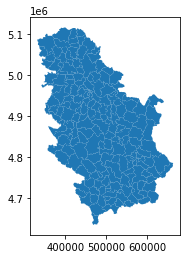

In [36]:
konture.plot()

Приметите да координате које се налазе у полигонима нису географска дужина и ширина изражене у степенима већ UTM запис. Ко хоће може да изврши конверзију ових података, али нама сада то није потребно.

Сад треба да повежемо две табеле: ону са просечним зарадама по општинама __neto_zarada__ и ову са контурама општина __konture__. Ако пажљиво погледате називи општина нису исти у првој и другој табели. У првој, на пример, пише "Александровац", док у другој имамо "АЛЕКСАНДРОВАЦ" и "ALEKSANDROVAC". То би била отежало повезивање да, срећом, нисмо сачували матичне бројеве општина. У првој табели то је била __idter__ колона, а у другој је то __opstina_maticni_broj__. Помоћу функције `rename()` преименоваћемо назив колоне у обе табеле у __MBO__ и конвертовати податке у тип _integer_ уколико то нисмо већ урадили.

In [37]:
konture=konture.rename(columns={'opstina_maticni_broj':'MBO'})

In [38]:
konture['MBO']=konture['MBO'].astype(int)

In [39]:
neto_zarada=neto_zarada.rename(columns={'idter':'MBO'})

Повезивање две табеле ћемо урадити помоћу функције `merge()` по колони __MBO__.

In [40]:
konture2 = pd.merge(konture,neto_zarada,on='MBO')
konture2.head(2)

,MBO,opstina_ime,opstina_imel,opstina_povrsina,okrug_sifra,okrug_ime,okrug_imel,wkt,geometry,nter,vrednost
0,80071,БАЧКА ТОПОЛА,BAČKA TOPOLA,0,1,СЕВЕРНОБАЧКИ УПРАВНИ ОКРУГ,SEVERNOBAČKI UPRAVNI OKRUG,"POLYGON((378765.834100001 5089008.2704,379027....","POLYGON ((378765.834 5089008.270, 379027.486 5...",Бачка Топола,51694.0
1,70637,КОЦЕЉЕВА,KOCELJEVA,0,8,МАЧВАНСКИ УПРАВНИ ОКРУГ,MAČVANSKI UPRAVNI OKRUG,"POLYGON((404664.3786 4935834.7331,404674.65500...","POLYGON ((404664.379 4935834.733, 404674.655 4...",Коцељева,46425.0


Сада би за сваку општину у табели требало да имамо и податке о заради и контуре. Остало је још само да то прикажемо на мапи.

<AxesSubplot:>

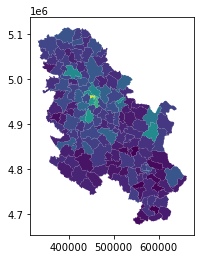

In [41]:
konture2.plot(column='vrednost')

Када пажљиво погледате мапу, видећете да подаци за општине на Косову и Метохији нису приказани. Табела општина са контурама има 197 редова, а табела са подацима о зарадама 175. Републички завод за статистику у својим извештајима нема месечне показатеље за КиМ. Због тога је спојена табела краћа за та 24 реда. Имајте у виду да званични подаци различитих државних органа могу да се разликују по овом питању.

Што се естетике мапе тиче, исту мапу можемо да прикажемо и са нешто више детаља, легендом, насловом итд. У наредној ћелији је пример како то може да се уради. Слободно варирајте параметре и изаберите мапу која се вама највише свиђа.

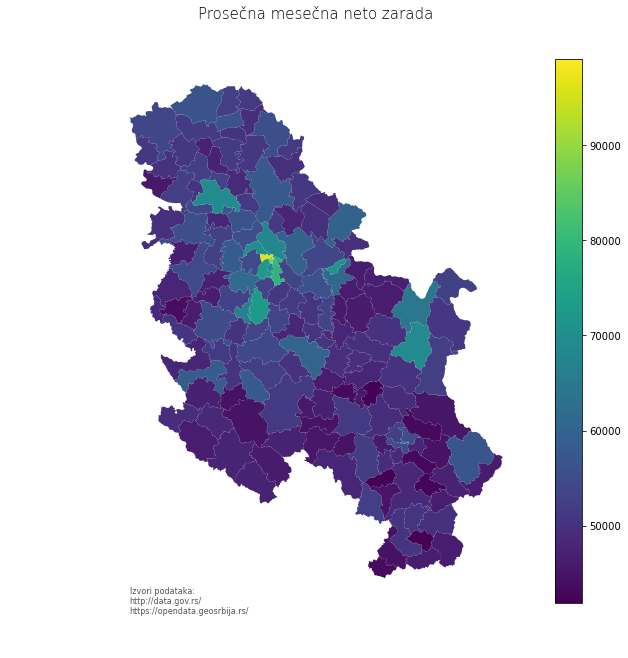

In [42]:
konture2.plot(column='vrednost', legend=True, figsize=(12, 10))
plt.axis('off')
plt.title('Prosečna mesečna neto zarada\n\n', fontdict={'fontsize': '15', 'fontweight': '1'})
plt.annotate('Izvori podataka: \nhttp://data.gov.rs/\nhttps://opendata.geosrbija.rs/',
             xy=(0.15, 0.10),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', 
             fontsize=8, color='#555555');